# Глава 5. Хэш-таблицы 

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Хэш-функции 

**Хэш-функция** - это функция, которая принимает строку и возвращает число.
<img src='./img/hash_func.png' width=700px>


Хэш-функция должна соответствовать некоторым требованиям:

 * Она должна быть последовательной.
 * Разным словам должны соответствовать разные числа.

Начнём с пустого массива:

In [2]:
m = pd.DataFrame({
    'Массив': ['-', '-', '-', '-', '-']
})
price = m['Массив']
price

0    -
1    -
2    -
3    -
4    -
Name: Массив, dtype: object

Передадим хэш-функции строу "апельсины":
<img src='./img/orange.png' wight=100px>

Хэш-функция выдает значение "3". 

Сохраняем цену апельсинов в элементе массива с индексом 3.

In [3]:
price[3] = 0.67

In [4]:
price

0       -
1       -
2       -
3    0.67
4       -
Name: Массив, dtype: object

Добавим молоко:

In [5]:
price[0] = 1.49
price

0    1.49
1       -
2       -
3    0.67
4       -
Name: Массив, dtype: object

Продолжаем действовать так, пока массив не заполнится полностью!

In [6]:
price[1] = 0.79
price[2] = 2.49
price[4] = 1.49
price

0    1.49
1    0.79
2    2.49
3    0.67
4    1.49
Name: Массив, dtype: object

Теперь представим, что нам нужно узнать сколько стоит авокадо!

Искать в массиве ничего не нужно, просто передаем строку "авокадо" в хэш-функцию.

<img src='./img/avokado.png' wight=100px>

Результат показывает, что значение хранится в элементе с индексом 4.

In [7]:
price[4]

1.49

 * Хэш-функция неизменно связывает название с одним индексом.
 * Хэш-функция связывает разные строки с разными индексами.
 * Хэш-функция знает размер массива и возвращает только действительные индексы.

Простю хэш-таблицу на  Python  можно создать используюя слоарь (dict):

In [8]:
book = dict()

In [9]:
book['apple'] = 0.67 # <-- яблоки стоят 67 центов
book['milk'] = 1.49 # <-- молоко стоит 67 центов
book['avocado'] = 1.49 # <-- авокадо стоят 67 центов

print(book)

{'apple': 0.67, 'milk': 1.49, 'avocado': 1.49}


Запросим цену авокадо:

In [10]:
print(book['avocado'])

1.49


## Примеры использования 

### Использование хэш-таблиц для поиска

#### Телефонная книга 

Пример: телефонная книга в телефоне. Она связыает имя человека с его номером.

Телефонная книга должна поддерживать следующие функции:

    * добавление имени человека и номера телефона, связанного с эти именем;
    * получение номера телефона, связанного с введенным именем;

Посмтроить телефонную книгу не сложно. Начнем с создания новой хэш-таблицы.

In [11]:
phone_book = {}

Добавим в телефонную книгу несколько номеров:

In [12]:
phone_book["jenny"] = 8675309
phone_book["emergency"] = 911

Ну вот и все. Теперь если мы хотим найти номер телефона Дженни - просто передаем ключ хэшу:

In [13]:
print(phone_book['jenny'])

8675309


#### Поиск сайта 

Представьте, что вам нужно перейти на веб-сайт, (например, http://adit.io). Ваш компьютер должен преобразовать символическое имя adit.io в IP-адрес.

ADIT.IO --> 173.255.248.55

Для любого посещаемого веб-сайта его имя превращается в IP:

    google.com --> 74.125.239.133
    facebook.com --> 173.252.120.6
    scribd.com --> 23.235.47.175

Связать символическое имя с IP-адресом - идеальная задача для хэш-таблиц! Этот процесси называется *преобразованием* ***DNS***.

Хэш-таблицы - всего лишь один из способов реализации этой функциональности.

#### Исключение дубликатов 

Предположим, вы руководите избирательным участком. Естественно, каждый избиратель может проголосовать всего один раз. Как проверить, что он не голосовал ранее? Когда человек приходит голосовать, вы узнаете его полное имя, а затем проверяете по списку уже проголосовавших избирателей.

Если имя входит в список - этот человек уже голосовал, гоните наглеца! В противном случае вы добавляете имя в список и разрешаете ему проголосовать.

Но если желающих проголосовать будет слишком много - вам придется каждый раз проверять огромный список снова и снова.

Эффективнее будет воспользоваться хэшем!

Создадим хэш для хранения информации об уже проголосовавших людях:

In [14]:
voted = {}

Когда кто-то приходит голосовать, проверим, присутствует ли его имя в хэше:

In [15]:
value = voted.get('Tom')
print(value)

None


Функция .get возвращает значение, если ключ 'Tom' присутствует в хэш-таблице. В противном случае возвращается None.

In [16]:
voted = {} # Создаем новую хэш-таблицу
def check_voter(name): 
    if voted.get(name): # Если имя содержится в списке, то
        print('Kick them out!') # Прогоняем человека
    else: 
        voted[name] = True # Иначе - записываем его имя в список 
        print('let them vote!') # И пускаем проголосовать!

In [17]:
check_voter('Tom')

let them vote!


In [18]:
check_voter('Mike')

let them vote!


In [19]:
check_voter('Mike')

Kick them out!


### Использование хэш-таблиц как кэша 

**Кэширование** - это запоминание компьютером данных для быстрого воспроизведения.

Преимущества *кэширования*:

    * вы получаете данные намного быстрее. ответ на запрос выдается мгновенно.
    * серверу приходится выполнять меньше работы.

*Кэширование* - стандартный способ ускорения работы. Все крупные веб-сайты применяют кэширование. А кэшируемые данные хранятся в **хэше!**

Для кэширования веб-страниц необходимо создать связь URL-адреса страницы и данных страницы.

    facebook.com/about -->> данные страницы с информацией о facebook
    facebook.com -->> данные домашней страницы

Когда вы посещаете какую-либо веб-страницу, сайт сначала проверяет, хранится ли страница в хэше.

В коде это выглядит так:

In [20]:
cache = {}

def get_page(url):
    if cache.get(url):
        return cache[url] # <<--- возвращаются кэшированные данные
    else:
        data = get_data_from_server(url)
        cache[url] = data # <<--- данные сначала сохраняются к кэше
        return data

### Шпаргалка
Хэши хорошо подходят длярешения следующих задач:

    * моделирование отношений между объектами;
    * устранение жубликатов;
    * кэширование/запоминание данных вместо выполнения работы на сервере.

## Коллизии 

**Коллизия** - это ситуация, при которой двум ключам назначается один элемент массива.

Возникает пролема - если сохранить в этом элементе значение второго ключа, то она запишется на место первого, а первый просто сотрется.

In [22]:
d = {}
d['el'] = 'key_1'
d

{'el': 'key_1'}

In [24]:
d['el'] = 'key_2' 
d # <-- 'key_1' просто стерся

{'el': 'key_2'}

Существует много разных стратегий обработки коллизий. 

Простейшая из них выглядит так: если несколько ключей отображаются на один элемент, в этом элементе создается связанный список.

In [25]:
d['el'] = ['key_1', 'key_2']
d

{'el': ['key_1', 'key_2']}

Но если ключей на один элемент будет слишком много, работа с данными сильно замедлится.

    * Хэш-функция должна распеделять клюи равномерно по всему хэшу.
    * В хорошей хэш-функции не бывает длинных связанных списков.

### Быстродействие 

In [26]:
speed = pd.DataFrame({
    'Средний случай': ['O(1)', 'O(1)', 'O(1)'],
    'Худший случай': ['O(n)', 'O(n)', 'O(n)']
}, index=['Поиск', 'Вставка', 'Удаление'])

speed

,Средний случай,Худший случай
Поиск,O(1),O(n)
Вставка,O(1),O(n)
Удаление,O(1),O(n)


В среднем хэш-таблицы выполняют любые операции за время O(1). 

Время О(1) называется *постоянным*. Это не означает, что операции выполняются мгновенно; просто время остается постоянным независимо от размера хэш-таблицы.

In [33]:
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "#808080",
    "family": "serif",
}

label_font = {
    "fontsize": 14,
    "family": "serif",
}

In [34]:
x = np.arange(100)
y = [1]*100

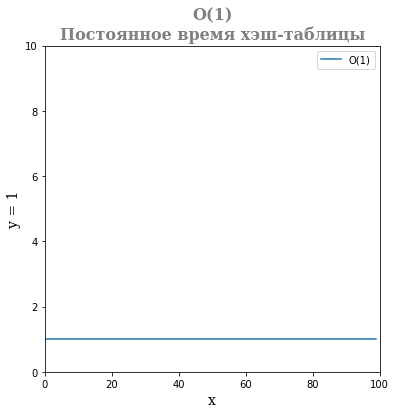

In [41]:
plt.figure(figsize=(6, 6))
plt.plot(x, y)

plt.title("O(1)\nПостоянное время хэш-таблицы", fontdict=title_font)
plt.xlabel("x", fontdict=label_font)
plt.ylabel("y = 1", fontdict=label_font)
plt.legend(labels=["O(1)"])

plt.axis([0, 100, 0, 10])

plt.show()

В среднем случае хэш-таблицы работают действительно быстро.

В худшем случае все операции с хэш-таблицей выполняются за время O(n) (линейное время), а это очень медленно. 

Сравним хэш-таблицы с массивами и списками.

In [44]:
speed = pd.DataFrame({
    'Хэш-таблицы (средний случай)': ['О(1)', 'О(1)', 'О(1)'],
    'Хэш-таблицы (худший случай)': ['О(n)', 'О(n)', 'О(n)'],
    'Массивы': ['О(1)', 'О(n)', 'О(n)'],
    'Связанные списки': ['О(n)', 'О(1)', 'О(1)']
}, index=['Поиск', 'Вставка', 'Удаление'])
speed

,Хэш-таблицы (средний случай),Хэш-таблицы (худший случай),Массивы,Связанные списки
Поиск,О(1),О(n),О(1),О(n)
Вставка,О(1),О(n),О(n),О(1)
Удаление,О(1),О(n),О(n),О(1)


Взглянем на средний случай для хэш-таблиц.

При поиске хэш-таблицы не уступают в скорости массивам. А при вставке и удалении они такие же быстрые, как и связанные списки. Получается, что они взяли лучшее от обеих структур!

Но в худшем случае хэш-таблицы медленно выполняют все эти операции, поэтому худшего случая нужно избегать. Для этого следует избегать *коллизий*.

Для предотвращения коллизий необходимы:

    * низкий коэффициент заполнения;
    * хорошая хэш-функция.    

## ШПАРГАЛКА 

Вам почти никогда не придется реализовывать хэш-функцию самостоятельно. Язык программирования, который вы используете, должен предоставить необходимую реализацию. Выможете пользоваться хэш-таблицами Python, и при этом вам будет обеспечена производительность среднего случая: постоянное время.

Хэш-таблицы чрезвычайно полезны, потому что они обеспечивают высокую скорость операций и позволяют по-разному моделировать данные. Возможно, вскоре выяснится, что вы постоянно используете их в своей работе.

    * Хэш-таблица создаете объединением хэш-функции с массивом;
    * Коллизии не желательны. Хэш-функция должна свести количество коллизий к минимуму;
    * Хэш-таблицы обеспечивают очень быстрое выполнение поиска, вставки и удаления.
    * Хэш-таблицы хорошо подходят для моделирования отношений между объектами;
    * Как только коэффициент заполнения превышает 0,7, пора изменять размер хэш-таблицы;
    * Хэш-таблицы используются для кэширования данных (например, на веб-серверах);
    * Хэш-таблицы хорошо подходят для обнаружения дубликатов.